In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pyneb as pn

In [2]:
pn.RedCorr().printLaws()

'No correction': 
        No correction, return 0.0
        
        
'CCM89': 
        Cardelli, Clayton & Mathis 1989, ApJ 345, 245
        http://adsabs.harvard.edu/abs/1989ApJ...345..245C
        
        Parameters:
            wave:  wavelength (Angstrom)

        **Comments:**
        
        Depends on R_V, default value being 3.1

        Scope: Applicable to both dense and diffuse ISM
        Range: UV through IR
        
        
'CCM89 Bal07': 
        Galactic extinction law based on Cardelli et al 1989, modified by Blagrave et al 2007 
        for 3.3 < x < 8 (1250 < lambda < 3030)
        
        Blagrave et al 2007, ApJ, 655, 299 
        http://adsabs.harvard.edu/abs/2007ApJ...655..299B
        Cardelli, Clayton & Mathis 1989, ApJ 345, 245
        http://adsabs.harvard.edu/abs/1989ApJ...345..245C
        
        Parameters:
            wave:  wavelength (Angstrom)

        **Comments:**
        
        Same as CCM89 for x<3.3 and x>8
        Revised values for 3.3<

In [3]:
pn.RedCorr().getLaws()

dict_keys(['No correction', 'CCM89', 'CCM89 Bal07', 'CCM89 oD94', 'S79 H83 CCM89', 'K76', 'SM79 Gal', 'G03 LMC', 'MCC99 FM90 LMC', 'F99-like', 'F99', 'F88 F99 LMC', 'Cal00'])

In [4]:
rc = pn.RedCorr(E_BV = 1.2, R_V = 3.2, law = 'F99')

In [5]:
rc = pn.RedCorr() 
rc.E_BV = 1.34
rc.law = 'S79 H83 CCM89'


In [6]:
rc.cHbeta

np.float64(1.9457101047071228)

In [7]:
rc.cHbeta = 2.
print(rc.E_BV)

1.3773891565431358


In [9]:
rc.setCorr(obs_over_theo=6.5 / 2.86, wave1=6563., wave2=4861.)print(rc.cHbeta)


In [10]:
print(rc.cHbeta)


1.1134093776707101


In [11]:
wave = 5007.0
corr = rc.getCorr(wave)
print(corr)

11.846898279423378


In [12]:
corr = rc.getCorrHb(wave)
print(corr)

0.9124210200172395


In [13]:
corr = rc.getCorr(5007., 6563.)
print(corr)

2.07325069462699


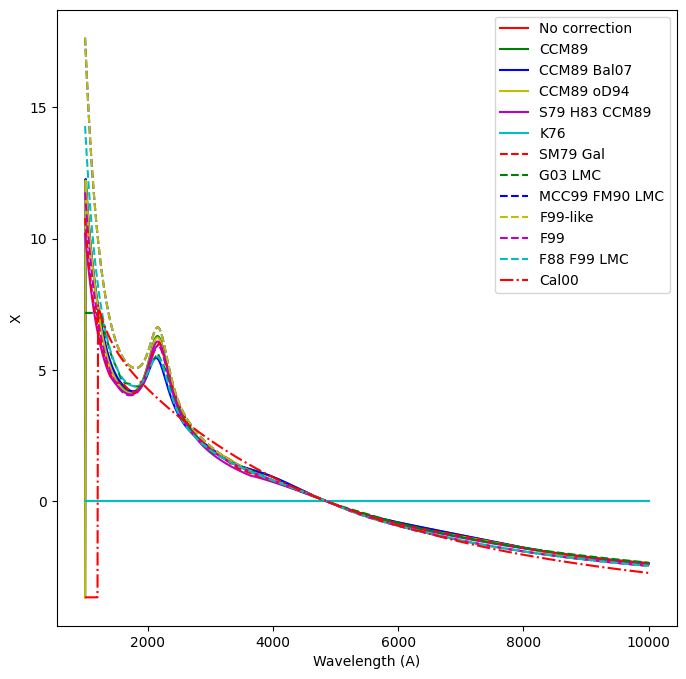

In [14]:
f, ax = plt.subplots(figsize=(8,8))
rc.plot(laws = 'all', ax=ax)

In [15]:
def my_X(wave, params = [5000., 1., 2., 3.]):
    return params[1] * (wave/params[0]) + params[2] * (wave/params[0])**-1 + params[3] * (wave/params[0])**-2
rc.UserFunction = my_X
rc.UserParams = [6000., 1., 5., 1.]
rc.law = 'user'
print(rc.getCorr(5007))

342.0931612017285
